In [1]:
import pandas as pd

In [2]:
df_model= pd.read_excel('consumption.xlsx')

In [3]:
df_model = df_model[df_model['Material'] == 90001043.0]

In [4]:
df_model.shape

(269, 17)

In [5]:
df_model = df_model[df_model['Qty in unit of entry'] < 0].copy()

In [6]:
data1 = df_model[['Material', 'Posting Date', 'Qty in unit of entry']]

In [7]:
data1.shape

(261, 3)

In [8]:
data1.head()

,Material,Posting Date,Qty in unit of entry
162,90001043.0,2025-02-21,-0.5
163,90001043.0,2025-02-20,-7.5
169,90001043.0,2025-02-19,-18.0
179,90001043.0,2025-02-18,-15.5
190,90001043.0,2025-02-17,-25.0


In [9]:
data1 = data1.drop(columns=['Material'])

In [10]:
data1['Qty in unit of entry'] = data1['Qty in unit of entry'].abs()

In [11]:
data1 = data1[data1['Posting Date'] > '2016-12-31'].copy()

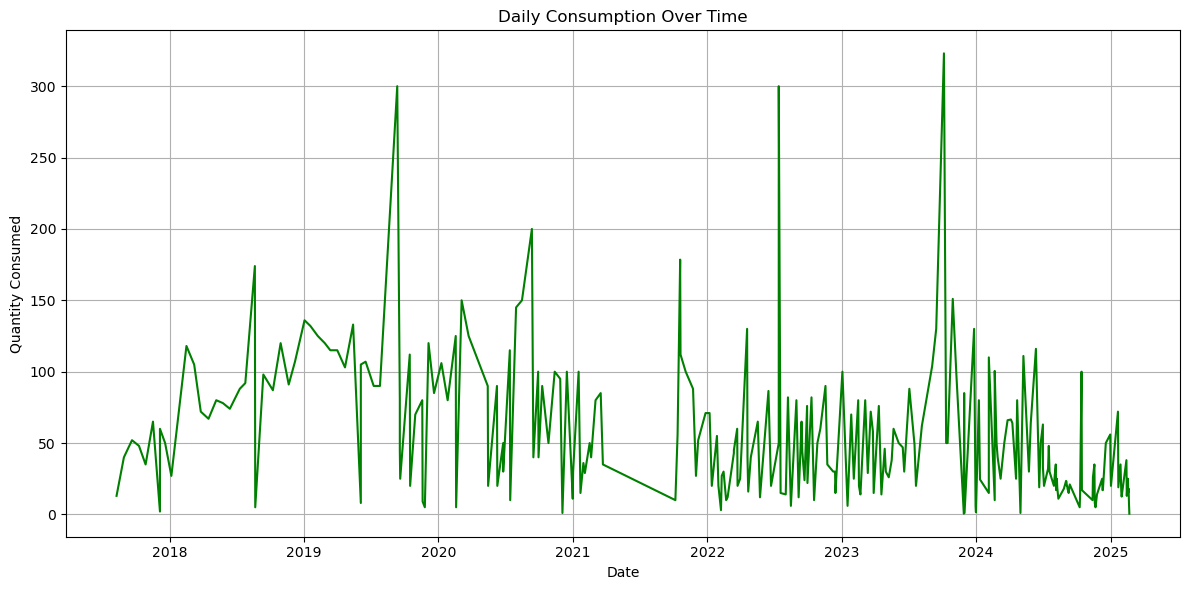

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data1['Posting Date'], data1['Qty in unit of entry'], color='green')

plt.title('Daily Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Consumed')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
data1.shape

(258, 2)

In [14]:
data1['Posting Date'] = pd.to_datetime(data1['Posting Date'])        # Ensure datetime
data1.set_index('Posting Date', inplace=True)             # Set as index

# Resample monthly
monthly_df = data1.resample('M').mean()            # or 'mean' if needed


In [15]:
monthly_df = monthly_df.asfreq('M')           # Add missing months with NaNs
monthly_df.fillna(0, inplace=True)            # Fill NaNs with 0 (no consumption)

In [16]:
monthly_df.head()

,Qty in unit of entry
Posting Date,
2017-08-31,26.500000
2017-09-30,52.000000
2017-10-31,41.500000
2017-11-30,65.000000
2017-12-31,37.333333


In [17]:
monthly_df.shape

(91, 1)

<Axes: title={'center': 'Monthly Consumption & Amount'}, xlabel='Posting Date'>

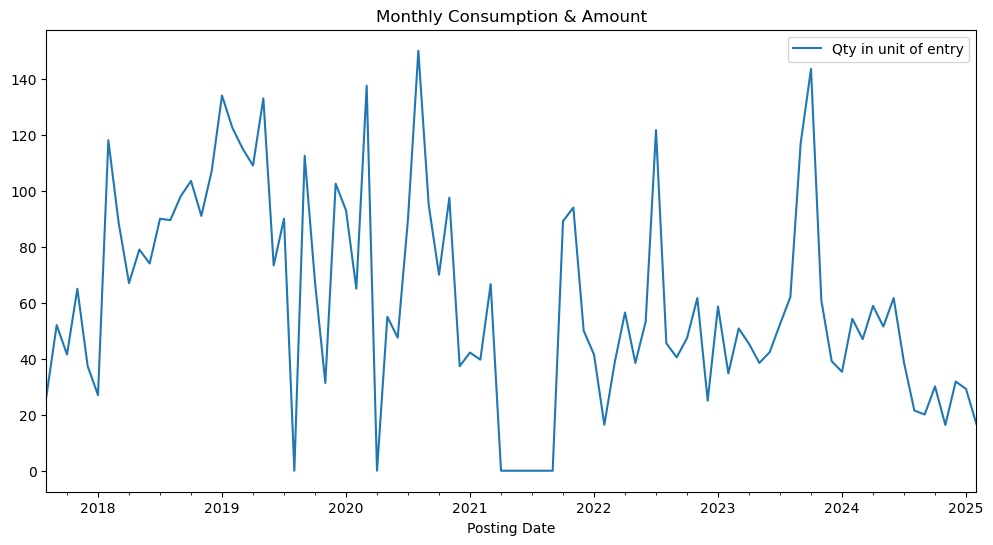

In [18]:
monthly_df[['Qty in unit of entry']].plot(figsize=(12,6), title="Monthly Consumption & Amount")


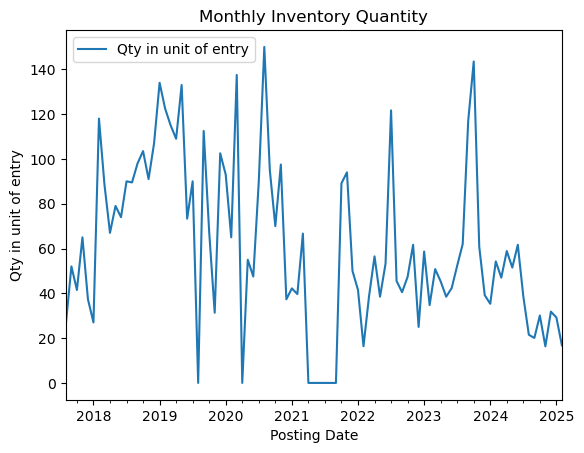

In [22]:
monthly_df.plot(title='Monthly Inventory Quantity')
plt.ylabel('Qty in unit of entry')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# gpt said use statsmodel instead of pmdarima
model = ARIMA(monthly_df['Qty in unit of entry'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)  # next 6 months

<Axes: xlabel='Posting Date'>

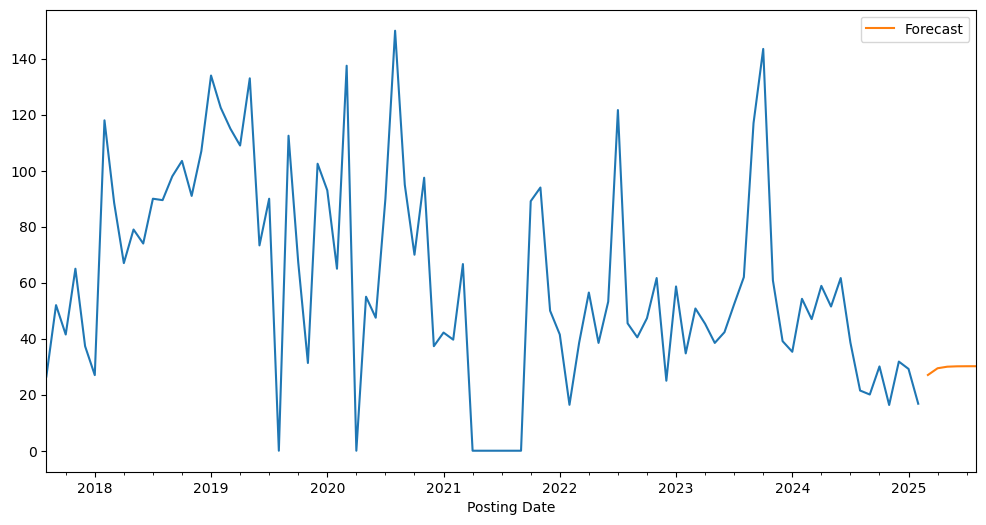

In [27]:
monthly_df['Qty in unit of entry'].plot(label='Observed', figsize=(12,6))
forecast.plot(label='Forecast', legend=True)

23:10:09 - cmdstanpy - INFO - Chain [1] start processing
23:10:09 - cmdstanpy - INFO - Chain [1] done processing


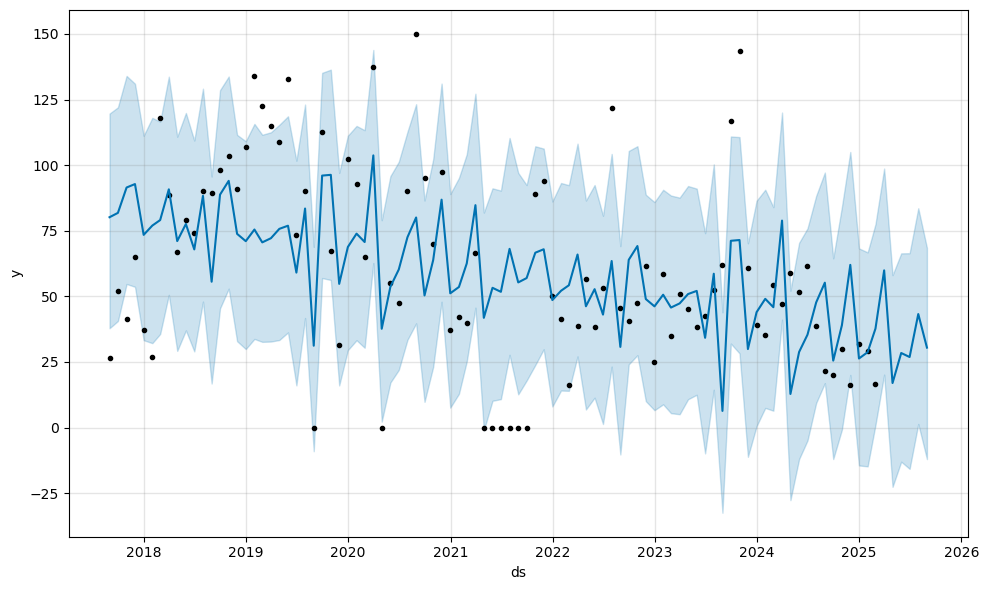

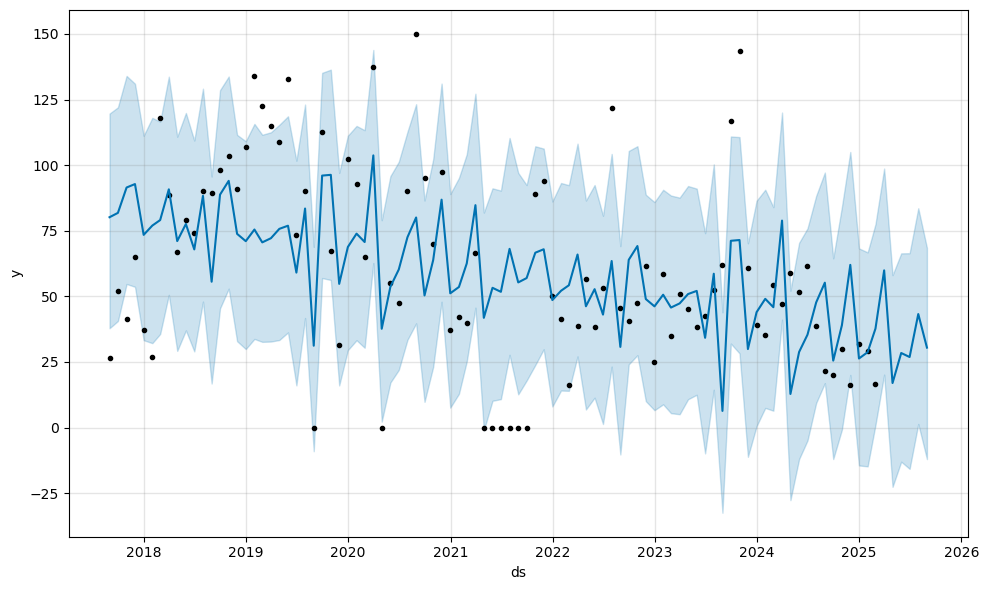

In [21]:
from prophet import Prophet

df_prophet = monthly_df.reset_index()[['Posting Date', 'Qty in unit of entry']]
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

model.plot(forecast)